# COVID-19 ANALYSIS USING COGNOS

###  Data Preprocessing 

###  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###  Reading Dataset

In [2]:
df = pd.read_csv("Covid_19_cases4.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


###  Display information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


# 

###  Display Columns

In [7]:
print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories'],
      dtype='object')


###  Checking Null Values

In [8]:
df.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

###  Display Last Five rows of the dataset

In [9]:
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden
2729,02-03-2021,2,3,2021,6191,19,Sweden


###  Display random Four Rows in the dataset

In [10]:
df.sample(4)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories
540,07-03-2021,7,3,2021,9167,159,Czechia
168,15-03-2021,15,3,2021,5281,25,Belgium
752,07-05-2021,7,5,2021,280,1,Finland
2440,18-03-2021,18,3,2021,3590,69,Slovakia


In [11]:
df[3:19]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria
5,26-05-2021,26,5,2021,287,8,Austria
6,25-05-2021,25,5,2021,342,3,Austria
7,24-05-2021,24,5,2021,520,3,Austria
8,23-05-2021,23,5,2021,626,8,Austria
9,22-05-2021,22,5,2021,671,12,Austria
10,21-05-2021,21,5,2021,603,8,Austria
11,20-05-2021,20,5,2021,866,13,Austria
12,19-05-2021,19,5,2021,630,11,Austria


In [13]:
df.shape

(2730, 7)

In [14]:
df[["dateRep","deaths"]]

,dateRep,deaths
0,31-05-2021,5
1,30-05-2021,6
2,29-05-2021,11
3,28-05-2021,4
4,27-05-2021,19
...,...,...
2725,06-03-2021,17
2726,05-03-2021,12
2727,04-03-2021,14
2728,03-03-2021,19


###  Displaying 15th row values

In [15]:
df.iloc[15]

dateRep                    16-05-2021
day                                16
month                               5
year                             2021
cases                             684
deaths                             12
countriesAndTerritories       Austria
Name: 15, dtype: object

###  Displaying column whose cases value=0

In [16]:
df.loc[df["cases"]==0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
764,25-04-2021,25,4,2021,0,0,Finland
771,18-04-2021,18,4,2021,0,0,Finland
1029,03-05-2021,3,5,2021,0,0,Greece
1183,31-05-2021,31,5,2021,0,0,Iceland
1184,30-05-2021,30,5,2021,0,0,Iceland
...,...,...,...,...,...,...,...
2621,19-03-2021,19,3,2021,0,0,Spain
2626,14-03-2021,14,3,2021,0,0,Spain
2627,13-03-2021,13,3,2021,0,0,Spain
2633,07-03-2021,7,3,2021,0,0,Spain


In [18]:
df["countriesAndTerritories"].value_counts()

Austria          91
Belgium          91
Spain            91
Slovenia         91
Slovakia         91
Romania          91
Portugal         91
Poland           91
Norway           91
Netherlands      91
Malta            91
Luxembourg       91
Lithuania        91
Liechtenstein    91
Latvia           91
Italy            91
Ireland          91
Iceland          91
Hungary          91
Greece           91
Germany          91
France           91
Finland          91
Estonia          91
Denmark          91
Czechia          91
Cyprus           91
Croatia          91
Bulgaria         91
Sweden           91
Name: countriesAndTerritories, dtype: int64

###  Aggregate Values

In [19]:
a=df["cases"]
print(a.sum())

9994560


In [20]:
print(a.mean())

3661.010989010989


In [21]:
print(a.median())

926.5


In [22]:
print(a.mode())

0    0
Name: cases, dtype: int64


In [23]:
print(a.min())

-2001


In [24]:
print(a.max())

53843


In [25]:
print(a.describe())

count     2730.000000
mean      3661.010989
std       6490.510073
min      -2001.000000
25%        361.250000
50%        926.500000
75%       3916.250000
max      53843.000000
Name: cases, dtype: float64


In [26]:
a=df["deaths"]
print(a.sum())

178247


In [27]:
print(a.mean())

65.29194139194139


In [28]:
print(a.median())

14.5


In [29]:
print(a.mode())

0    0
Name: deaths, dtype: int64


In [30]:
print(a.max())

956


In [31]:
print(a.min())

-3


In [32]:
print(a.describe())

count    2730.000000
mean       65.291941
std       113.956634
min        -3.000000
25%         2.000000
50%        14.500000
75%        72.000000
max       956.000000
Name: deaths, dtype: float64


###  Checking Null Values

In [33]:
df.isnull()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2725,False,False,False,False,False,False,False
2726,False,False,False,False,False,False,False
2727,False,False,False,False,False,False,False
2728,False,False,False,False,False,False,False


# 

# 

# 

# 

# 

###  Checking NotNull Values

In [34]:
df.notnull()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
2725,True,True,True,True,True,True,True
2726,True,True,True,True,True,True,True
2727,True,True,True,True,True,True,True
2728,True,True,True,True,True,True,True


In [35]:
df.style

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria
5,26-05-2021,26,5,2021,287,8,Austria
6,25-05-2021,25,5,2021,342,3,Austria
7,24-05-2021,24,5,2021,520,3,Austria
8,23-05-2021,23,5,2021,626,8,Austria
9,22-05-2021,22,5,2021,671,12,Austria


# 

# 

# 

###  Display the dataset based on conditions

In [38]:
g=df[df["deaths"]>570]
print(g)

         dateRep  day  month  year  cases  deaths countriesAndTerritories
884   27-03-2021   27      3  2021  39932     897                  France
1416  10-04-2021   10      4  2021  18924     718                   Italy
1418  08-04-2021    8      4  2021  13686     627                   Italy
2125  29-04-2021   29      4  2021   8893     636                  Poland
2131  23-04-2021   23      4  2021  12763     695                  Poland
2132  22-04-2021   22      4  2021  13922     739                  Poland
2133  21-04-2021   21      4  2021   9244     601                  Poland
2136  18-04-2021   18      4  2021  15786     617                  Poland
2137  17-04-2021   17      4  2021  17846     596                  Poland
2138  16-04-2021   16      4  2021  21126     682                  Poland
2139  15-04-2021   15      4  2021  21266     804                  Poland
2140  14-04-2021   14      4  2021  13203     645                  Poland
2143  11-04-2021   11      4  2021  24

In [39]:
g=df[df["cases"]<600]
print(g)

         dateRep  day  month  year  cases  deaths countriesAndTerritories
0     31-05-2021   31      5  2021    366       5                 Austria
1     30-05-2021   30      5  2021    570       6                 Austria
2     29-05-2021   29      5  2021    538      11                 Austria
4     27-05-2021   27      5  2021    405      19                 Austria
5     26-05-2021   26      5  2021    287       8                 Austria
...          ...  ...    ...   ...    ...     ...                     ...
2633  07-03-2021    7      3  2021      0       0                   Spain
2634  06-03-2021    6      3  2021      0       0                   Spain
2641  29-05-2021   29      5  2021    285       8                  Sweden
2642  28-05-2021   28      5  2021    297       2                  Sweden
2643  27-05-2021   27      5  2021     90       8                  Sweden

[1055 rows x 7 columns]


In [40]:
g=df[df["deaths"]>600]
print(g)

         dateRep  day  month  year  cases  deaths countriesAndTerritories
884   27-03-2021   27      3  2021  39932     897                  France
1416  10-04-2021   10      4  2021  18924     718                   Italy
1418  08-04-2021    8      4  2021  13686     627                   Italy
2125  29-04-2021   29      4  2021   8893     636                  Poland
2131  23-04-2021   23      4  2021  12763     695                  Poland
2132  22-04-2021   22      4  2021  13922     739                  Poland
2133  21-04-2021   21      4  2021   9244     601                  Poland
2136  18-04-2021   18      4  2021  15786     617                  Poland
2138  16-04-2021   16      4  2021  21126     682                  Poland
2139  15-04-2021   15      4  2021  21266     804                  Poland
2140  14-04-2021   14      4  2021  13203     645                  Poland
2143  11-04-2021   11      4  2021  24892     749                  Poland
2144  10-04-2021   10      4  2021  28

In [42]:
s=df.skew()
print(s)


day       0.000000
month    -0.020255
year      0.000000
cases     3.142047
deaths    2.772070
dtype: float64


C:\Users\susia\AppData\Local\Temp\ipykernel_29408\2883028102.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s=df.skew()


###  Display unique value in the dataset

In [43]:
df.nunique

<bound method DataFrame.nunique of          dateRep  day  month  year  cases  deaths countriesAndTerritories
0     31-05-2021   31      5  2021    366       5                 Austria
1     30-05-2021   30      5  2021    570       6                 Austria
2     29-05-2021   29      5  2021    538      11                 Austria
3     28-05-2021   28      5  2021    639       4                 Austria
4     27-05-2021   27      5  2021    405      19                 Austria
...          ...  ...    ...   ...    ...     ...                     ...
2725  06-03-2021    6      3  2021   3455      17                  Sweden
2726  05-03-2021    5      3  2021   4069      12                  Sweden
2727  04-03-2021    4      3  2021   4884      14                  Sweden
2728  03-03-2021    3      3  2021   4876      19                  Sweden
2729  02-03-2021    2      3  2021   6191      19                  Sweden

[2730 rows x 7 columns]>

In [46]:
s=df["cases"].value_counts()*100/len(df)
print(s)

0        3.992674
2        0.952381
1        0.842491
4        0.732601
5        0.586081
           ...   
43554    0.036630
39629    0.036630
39506    0.036630
38693    0.036630
6191     0.036630
Name: cases, Length: 1902, dtype: float64


In [48]:
x=df.groupby("countriesAndTerritories").agg({"deaths":"mean"})
print(x)

                             deaths
countriesAndTerritories            
Austria                   21.153846
Belgium                   29.626374
Bulgaria                  82.098901
Croatia                   27.340659
Cyprus                     1.417582
Czechia                  105.923077
Denmark                    1.703297
Estonia                    7.186813
Finland                    1.945055
France                   252.494505
Germany                  201.505495
Greece                    60.989011
Hungary                  161.263736
Iceland                    0.010989
Ireland                    6.835165
Italy                    311.505495
Latvia                     8.263736
Liechtenstein              0.043956
Lithuania                 11.230769
Luxembourg                 1.934066
Malta                      1.142857
Netherlands               22.582418
Norway                     1.769231
Poland                   329.329670
Portugal                   7.758242
Romania                  109

In [50]:
x=df.groupby("countriesAndTerritories").agg({"cases":"max"})
print(x)

                         cases
countriesAndTerritories       
Austria                   4051
Belgium                   6285
Bulgaria                  5176
Croatia                   3217
Cyprus                     941
Czechia                  16816
Denmark                   2007
Estonia                   1956
Finland                    863
France                   53843
Germany                  29518
Greece                    4322
Hungary                  11265
Iceland                     43
Ireland                    768
Italy                    26790
Latvia                    1036
Liechtenstein               18
Lithuania                 2055
Luxembourg                 461
Malta                      501
Netherlands               9587
Norway                    2400
Poland                   35253
Portugal                  1007
Romania                   6651
Slovakia                  6107
Slovenia                  1802
Spain                    22744
Sweden                    8872


In [51]:
x=df.groupby("countriesAndTerritories").agg({"deaths":"min"})
print(x)

                         deaths
countriesAndTerritories        
Austria                       3
Belgium                       6
Bulgaria                      5
Croatia                       4
Cyprus                        0
Czechia                       3
Denmark                       0
Estonia                       0
Finland                       0
France                       44
Germany                      33
Greece                        0
Hungary                       5
Iceland                       0
Ireland                      -3
Italy                        44
Latvia                        0
Liechtenstein                 0
Lithuania                     4
Luxembourg                    0
Malta                         0
Netherlands                   3
Norway                        0
Poland                       11
Portugal                      0
Romania                      29
Slovakia                      0
Slovenia                      0
Spain                         0
Sweden  

###  Display the sum of duplicated values in  the dataset

In [52]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2725    False
2726    False
2727    False
2728    False
2729    False
Length: 2730, dtype: bool>

In [53]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       dateRep    day  month   year  cases  deaths  countriesAndTerritories
0       False  False  False  False  False   False                    False
1       False  False  False  False  False   False                    False
2       False  False  False  False  False   False                    False
3       False  False  False  False  False   False                    False
4       False  False  False  False  False   False                    False
...       ...    ...    ...    ...    ...     ...                      ...
2725    False  False  False  False  False   False                    False
2726    False  False  False  False  False   False                    False
2727    False  False  False  False  False   False                    False
2728    False  False  False  False  False   False                    False
2729    False  False  False  False  False   False                    False

[2730 rows x 7 columns]>

In [54]:
(df[df.columns]==0).sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                      109
deaths                     465
countriesAndTerritories      0
dtype: int64

###  Display the correlations between columns

In [55]:
df.corr()

,day,month,year,cases,deaths
day,1.000000,-0.022973,NaN,-0.026988,-0.038128
month,-0.022973,1.000000,NaN,-0.172412,-0.126515
year,NaN,NaN,NaN,NaN,NaN
cases,-0.026988,-0.172412,NaN,1.000000,0.766309
deaths,-0.038128,-0.126515,NaN,0.766309,1.000000


###   Data Visualization 

###  Hist

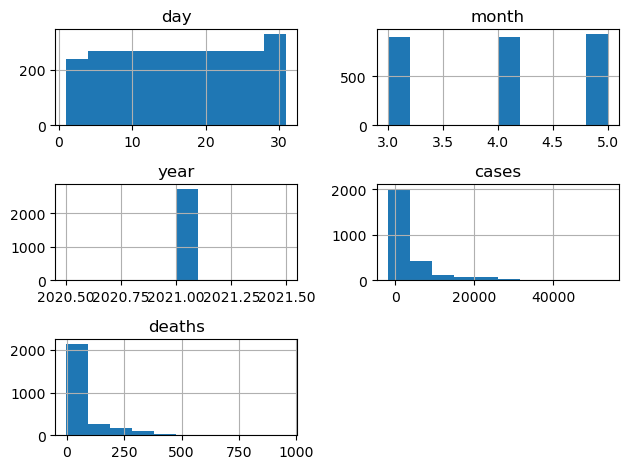

In [59]:
df.hist()
plt.tight_layout()
plt.show()

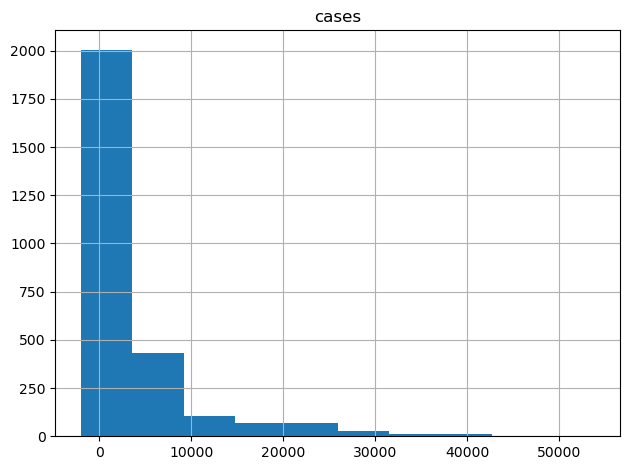

In [60]:
df.hist("cases")
plt.tight_layout()
plt.show()

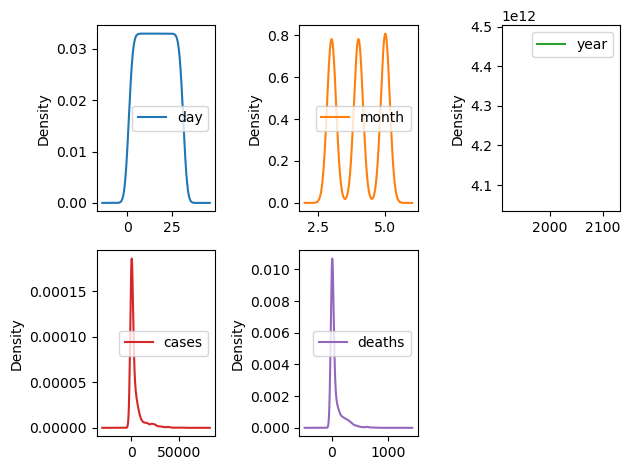

In [61]:
df.plot(kind="density",subplots=True,layout=(2,3),sharex=False)
plt.tight_layout()
plt.show()

###  Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1acbc27d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1acbc27d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1acbc26bee0>,
 'medians': [<matplotlib.lines.Line2D at 0x1acbc27dd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1acbc287040>,
 'means': []}

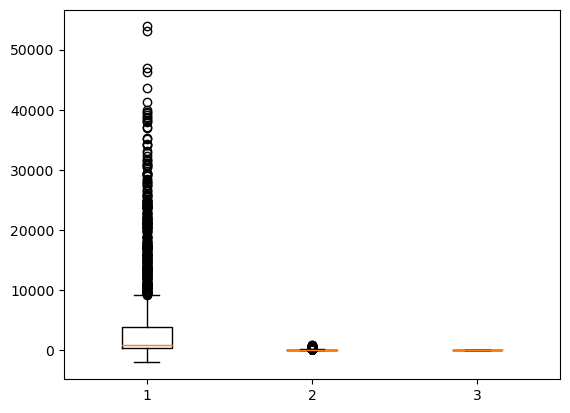

In [74]:
x=df[["cases","deaths","day"]]
plt.boxplot(x)

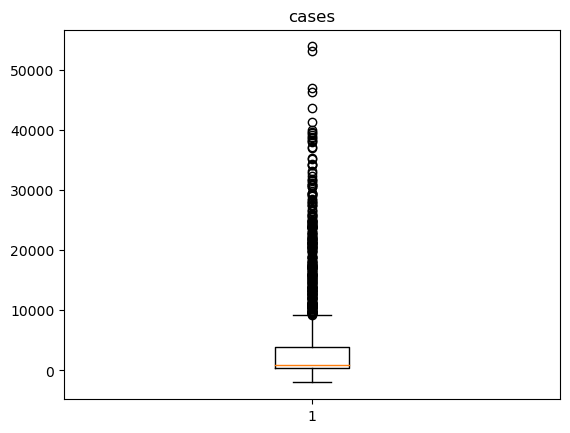

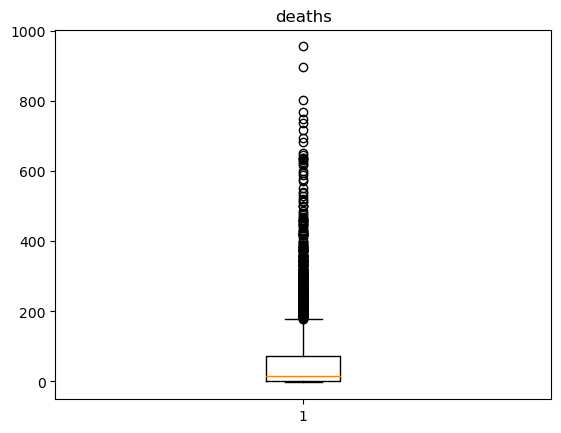

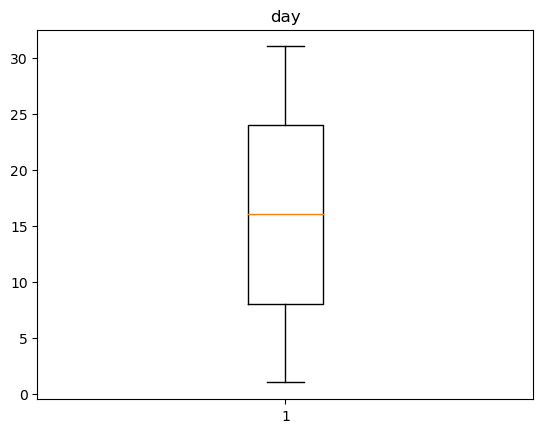

In [75]:
import matplotlib.pyplot as plt
for i in x.columns:
    plt.boxplot(x[i])
    plt.title(i)
    plt.show()

###  Pair Plot

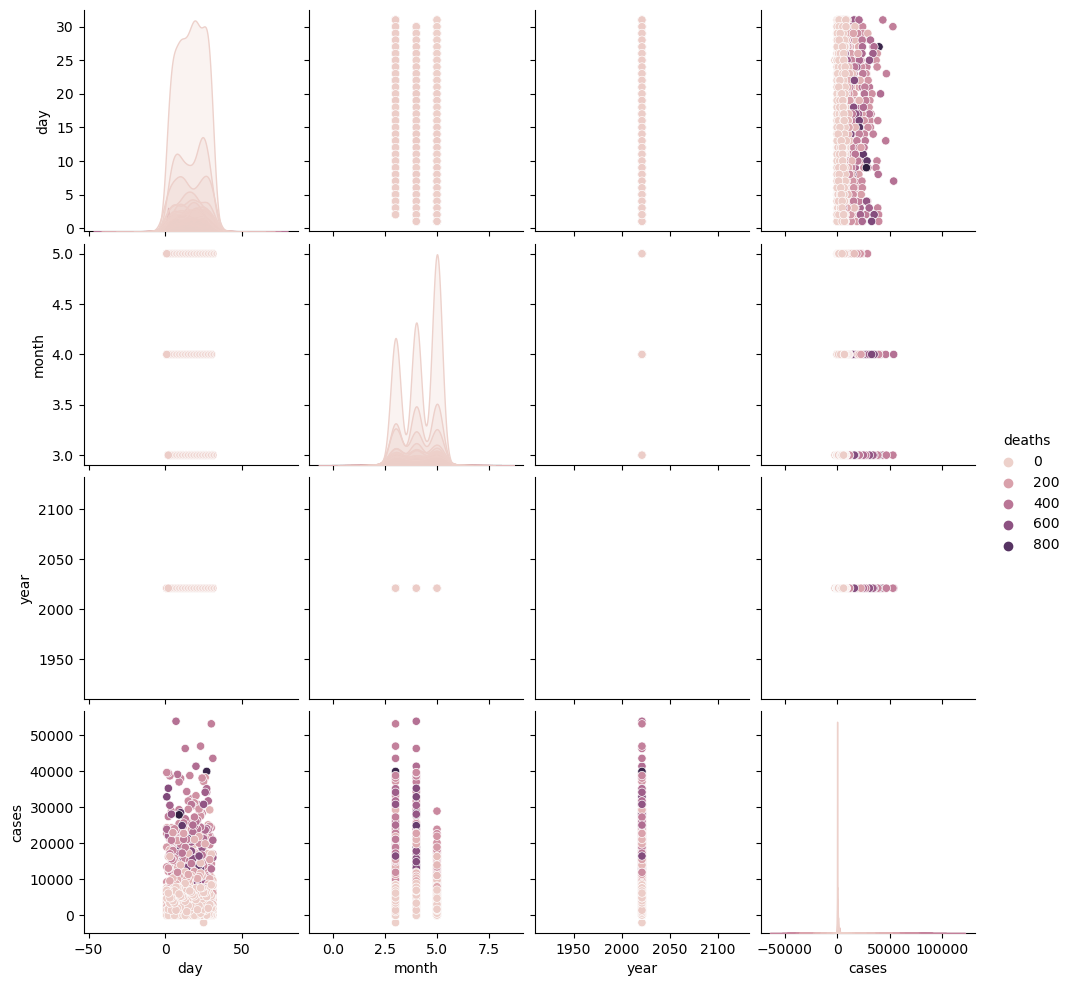

In [64]:
s=sns.pairplot(df,hue="deaths")
print(s)

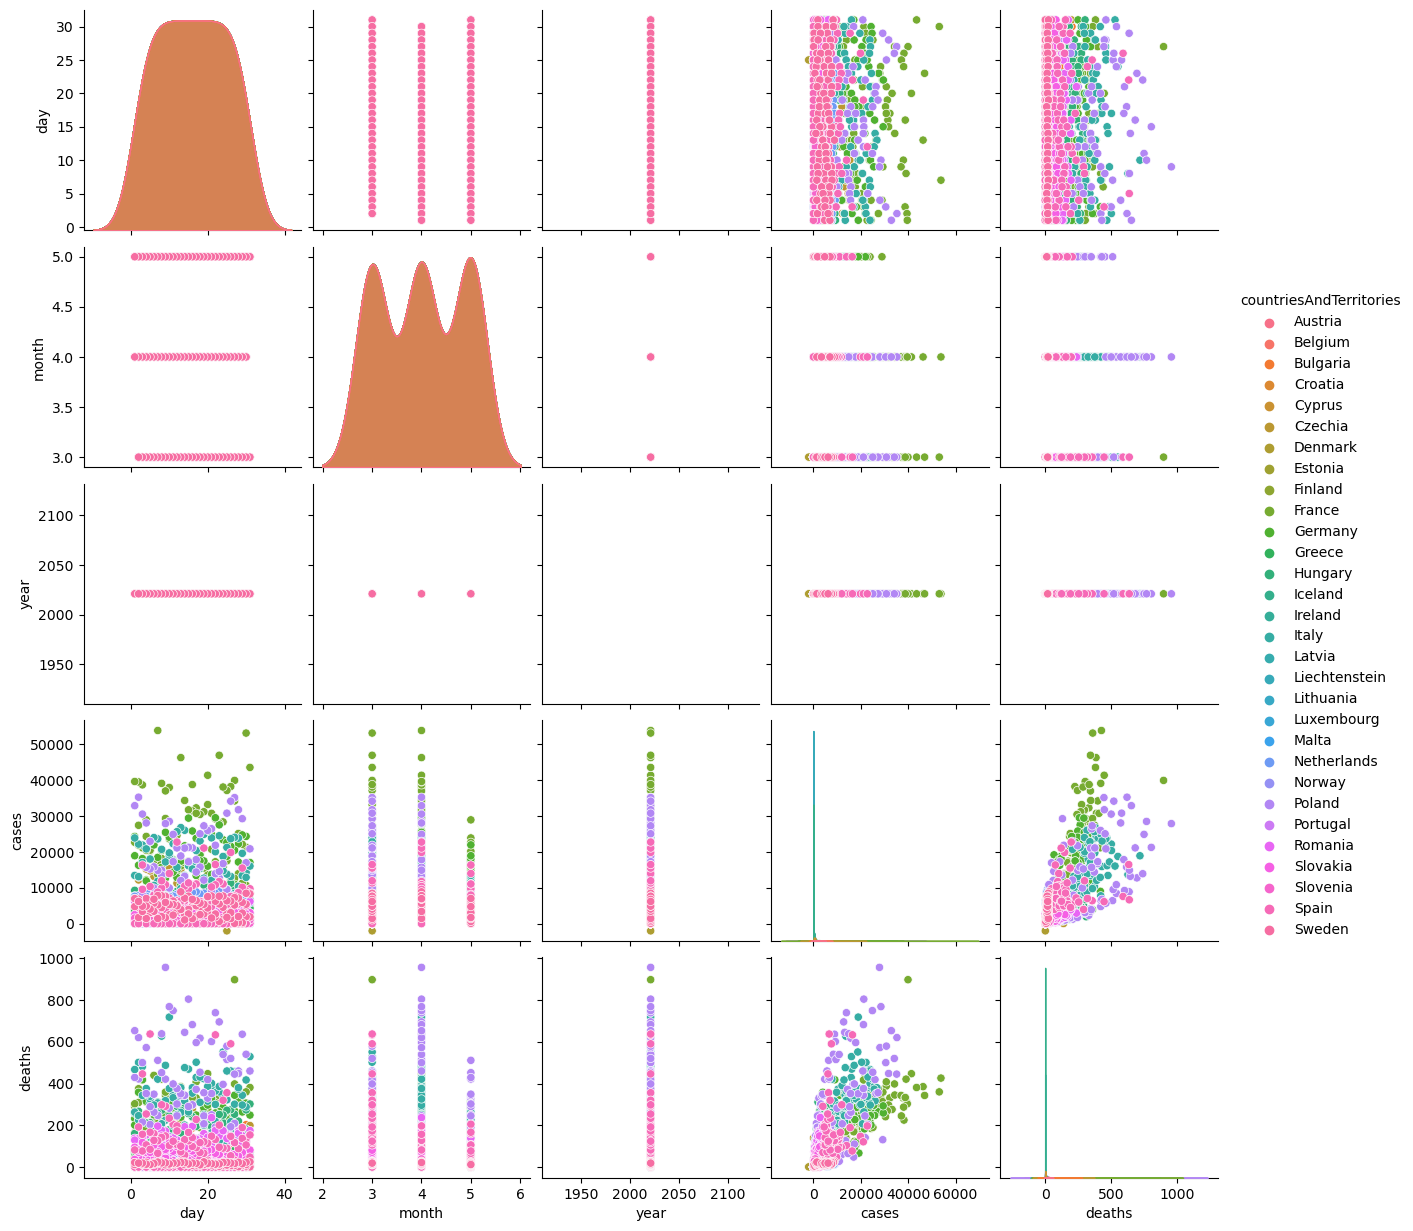

In [65]:
s=sns.pairplot(df,hue="countriesAndTerritories")
print(s)

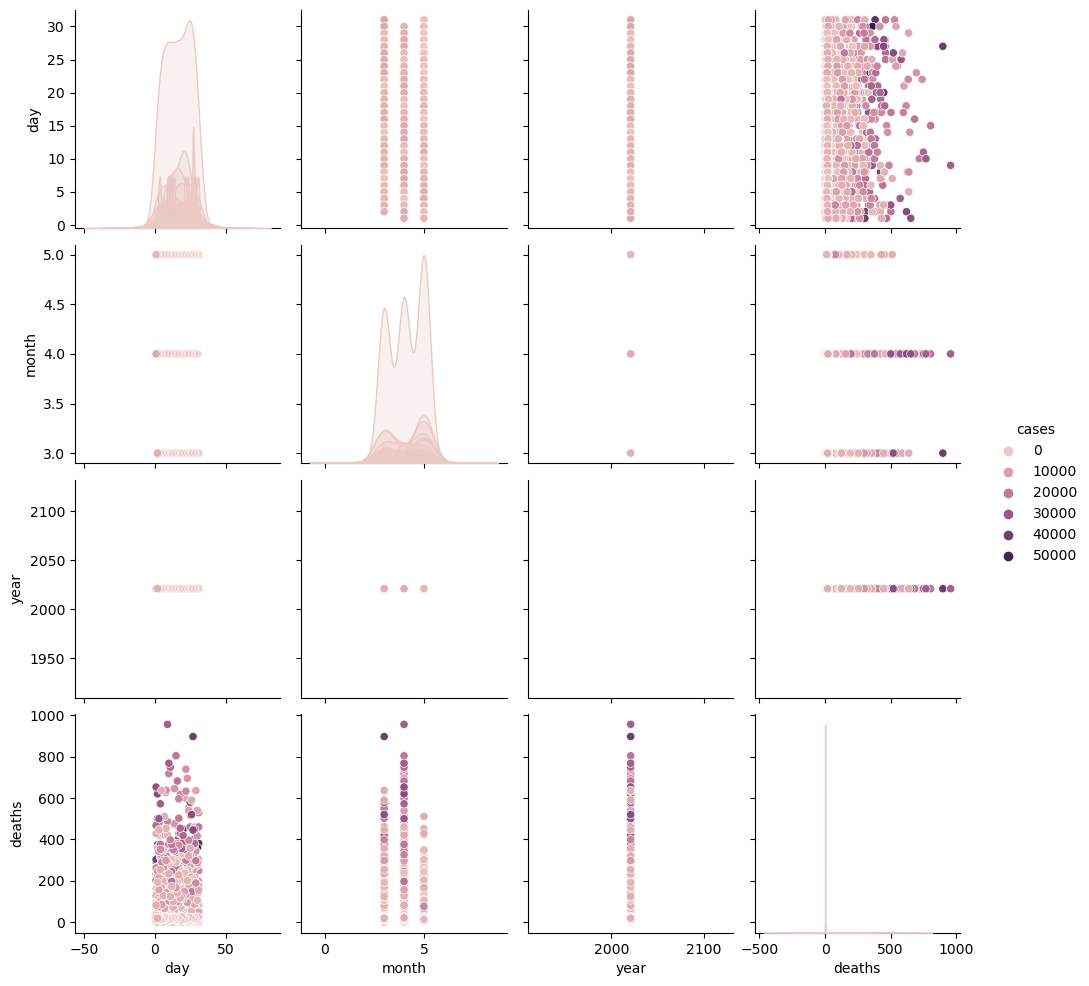

In [66]:
s=sns.pairplot(df,hue="cases")
print(s)

{'whiskers': [<matplotlib.lines.Line2D at 0x1acb78328e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1acb7832e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1acb7825490>,
 'medians': [<matplotlib.lines.Line2D at 0x1acb7841460>,
 'fliers': [<matplotlib.lines.Line2D at 0x1acb7841730>,
 'means': []}

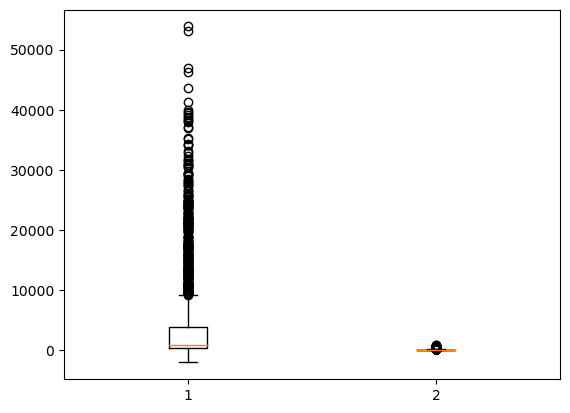

In [70]:
x=df[["cases","deaths"]]
plt.boxplot(x)

###  Scatter Plot

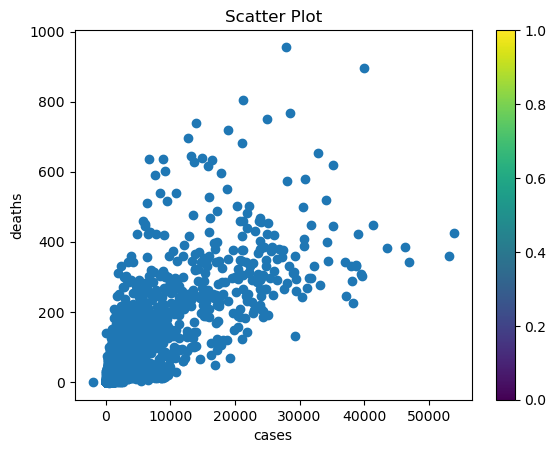

In [77]:
plt.scatter(df['cases'], df['deaths'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('cases')
plt.ylabel('deaths')
plt.colorbar()
plt.show()

###  Bar Plot

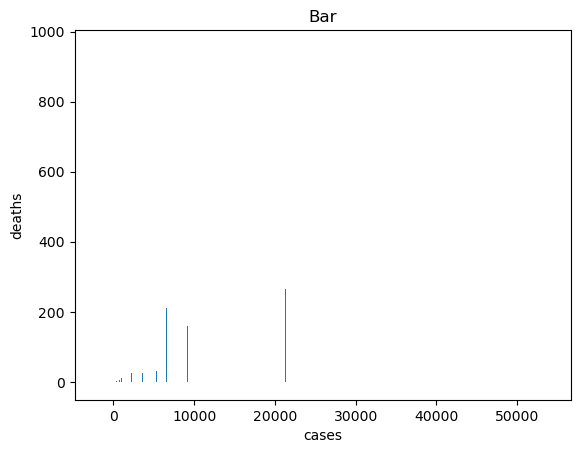

In [86]:
plt.bar(df['cases'], df['deaths'])
 
# Adding Title to the Plot
plt.title("Bar")
 
# Setting the X and Y labels
plt.xlabel('cases')
plt.ylabel('deaths')

plt.show()

###  Line Plot

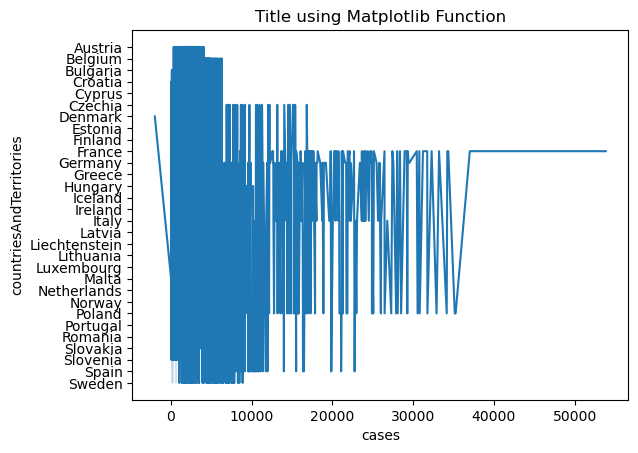

In [89]:
sns.lineplot(x="cases", y="countriesAndTerritories", data=df)
 
# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')
 
plt.show()

###  Conclusion

     Hence, the Covid-19 analysis using cognos has been preprocessed,  exploratory data analysis has been performed successfully.             The missing values are handled and outliers are visualized.